<font color='#415a77'>

# **The Problem:**

One of the major challenges faced by airports and airlines is the optimization of operations to ensure smooth air traffic, reduce costs, and improve the passenger experience. One of the key performance indicators in this context is the turnaround time.


### **What is Turnaround?**

Turnaround is one of the most critical processes in airport operations, as it directly affects the efficiency, punctuality, and profitability of airlines. This term refers to the time required for an aircraft to complete all ground activities between landing and the next takeoff. The faster and more efficient this process is, the lower the operational costs and the greater the airport’s capacity to handle a higher volume of flights.


### **The Importance of Turnaround:**

Optimizing turnaround reduces delays, improves punctuality, and increases operational efficiency, positively impacting the reputation of both airlines and airports. Moreover, a well-managed turnaround enables better fleet utilization, contributing to the sustainability of the aviation sector.


### **The Challenge:**

In this scenario, there is a need to develop an analytical model capable of identifying which processes may be creating operational bottlenecks and affecting the total ground time, considering various factors such as:

	- Passenger disembarkation/embarkation
	- Baggage removal
	- Aircraft cleaning
	- Restocking of supplies
	- Fuel refueling
	- Maintenance and technical inspections
	- Baggage and cargo loading
	- Passenger boarding
	- Crew change

### **Benefits of Optimizing Turnaround Time:**

	- Delay reduction: With a faster and more efficient operational flow, flights depart on schedule, minimizing impacts on the flight network.
	- Increased operational capacity: Optimized processes allow more flights to be handled without the need for infrastructure expansion.
	- Reduced operational costs: Less ground time means lower expenses with fuel, staff, and airport fees.
	- Improved passenger experience: Faster boarding and disembarkation lead to greater satisfaction and comfort for travelers.
	- Sustainability: Less ground waiting time results in lower carbon emissions, contributing to environmental efficiency.
	- Fleet optimization: With less idle time, aircraft can perform more flights per day, maximizing profitability.
	- Greater predictability: With predictive analysis tools, it’s possible to anticipate and address bottlenecks before they impact operations.

### **Next Steps:**

To solve this problem, the following steps are necessary:

	- Data collection and organization: Gather historical data on airport operations, including records of each process that affects turnaround.
	- Exploratory data analysis: Identify the most important variables and their relationships with turnaround time.
	- Building a predictive model: Use machine learning techniques to develop a model capable of identifying the processes that most affect turnaround time.
	- Model validation: Assess the model’s accuracy using a test dataset.
	- Implementation and monitoring: Integrate the model into a decision-support system and continuously monitor its performance.
	- By implementing a solution to predict taxi time, airports and airlines can optimize their operations, reduce costs, and enhance customer satisfaction.

</font>

# Initial Setup

## Imports

In [290]:
# importing the necessary libraries
#%pip install ydata-profiling
%pip install -q -U watermark

# importing data manipulation libraries
import pandas as pd
import numpy as np

#importing os manipulation libraries
import os

#importing shape library for model interpretability
import shap

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# importing machine learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# importing machine learning models
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb

# importing evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

#importing warnings library
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [291]:
%reload_ext watermark
%watermark -a "Renan Amaral" -u -d -v -p pandas,n

Author: Renan Amaral

Last updated: 2025-08-12

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.27.0

pandas: 2.2.2
n     : not installed



In [292]:
# loading the dataset in the folder 'data/raw'
#print(os.getcwd())
df = pd.read_csv('../data/raw/Turnaround.csv',encoding='latin1')

In [293]:
df.head()

,Data,tipo_aeronave,finger_remoto,hora_parada,hora_corte_motor,hora_calco,hora_ultimo_cone,inicio_descarregamento_bag,fim_descarregamento_bag,descarregamento_esteira,...,hora_fim_carregamento_bag,hora_inicio_embarque,hora_fim_embarque,hora_fechamento_porta,hora_desacoplamento_finger,hora_conexao_pushback,hora_inicio_pushback,hora_fim_pushback,hora_aeronave_liberada,Inter / Dom
0,12/11/2018,800,FINGER,19:13:52,19:14:11,19:14:21,19:14:46,19:14:59,19:27:11,Nao,...,19:48:28,19:33:46,19:50:00,19:58:31,19:59:26,20:00:03,20:00:16,20:02:05,20:02:54,Doméstico
1,13/11/2018,800,FINGER,11:58:42,11:58:45,12:00:00,12:01:24,12:01:56,12:17:10,Sim,...,12:36:56,12:12:32,12:36:03,12:37:35,12:38:59,12:31:59,12:40:51,12:42:22,12:43:50,Doméstico
2,13/11/2018,700,FINGER,10:58:54,10:59:02,10:59:35,11:01:10,11:01:29,11:24:35,Sim,...,11:42:54,11:16:27,11:36:37,11:44:46,11:45:01,11:39:56,11:50:02,11:52:04,11:54:07,Doméstico
3,13/11/2018,700,FINGER,10:02:54,10:03:03,10:03:35,10:03:50,10:03:56,10:29:50,Sim,...,10:46:23,10:19:52,10:40:40,10:46:45,10:48:26,10:44:29,10:49:34,10:51:21,10:52:26,Doméstico
4,13/11/2018,700,FINGER,09:08:04,09:08:11,09:08:47,09:10:08,09:10:10,09:25:38,Sim,...,09:41:12,09:22:09,09:37:45,09:40:25,09:41:43,09:39:20,09:44:54,09:46:13,09:46:58,Doméstico


## Exploratory Data Analysis

In [294]:
# evaluating the column names
df.columns

Index(['Data', 'tipo_aeronave', 'finger_remoto', 'hora_parada',
       'hora_corte_motor', 'hora_calco', 'hora_ultimo_cone',
       'inicio_descarregamento_bag', 'fim_descarregamento_bag',
       'descarregamento_esteira', 'hora_acoplagem_finger',
       'hora_inicio_desembarque', 'hora_fim_desembarque',
       'hora_inicio_limpeza', 'hora_fim_limpeza', 'hora_inicio_abastecimiento',
       'hora_fim_abastecimento', 'hora_inicio_catering', 'hora_fim_catering',
       'hora_inicio_carregamento_bag', 'hora_fim_carregamento_bag',
       'hora_inicio_embarque', 'hora_fim_embarque', 'hora_fechamento_porta',
       'hora_desacoplamento_finger', 'hora_conexao_pushback',
       'hora_inicio_pushback', 'hora_fim_pushback', 'hora_aeronave_liberada',
       'Inter / Dom'],
      dtype='object')

In [295]:
# evaluating the data types of the columns
df.dtypes

Data                            object
tipo_aeronave                    int64
finger_remoto                   object
hora_parada                     object
hora_corte_motor                object
hora_calco                      object
hora_ultimo_cone                object
inicio_descarregamento_bag      object
fim_descarregamento_bag         object
descarregamento_esteira         object
hora_acoplagem_finger           object
hora_inicio_desembarque         object
hora_fim_desembarque            object
hora_inicio_limpeza             object
hora_fim_limpeza                object
hora_inicio_abastecimiento      object
hora_fim_abastecimento          object
hora_inicio_catering            object
hora_fim_catering               object
hora_inicio_carregamento_bag    object
hora_fim_carregamento_bag       object
hora_inicio_embarque            object
hora_fim_embarque               object
hora_fechamento_porta           object
hora_desacoplamento_finger      object
hora_conexao_pushback    

In [296]:
# evaluating the presence of null values
df.isnull().sum()

Data                             0
tipo_aeronave                    0
finger_remoto                    0
hora_parada                      0
hora_corte_motor                 0
hora_calco                       0
hora_ultimo_cone                 0
inicio_descarregamento_bag       0
fim_descarregamento_bag          0
descarregamento_esteira          0
hora_acoplagem_finger            0
hora_inicio_desembarque          0
hora_fim_desembarque             0
hora_inicio_limpeza              1
hora_fim_limpeza                 0
hora_inicio_abastecimiento       0
hora_fim_abastecimento           0
hora_inicio_catering             0
hora_fim_catering                0
hora_inicio_carregamento_bag     0
hora_fim_carregamento_bag        0
hora_inicio_embarque             0
hora_fim_embarque                0
hora_fechamento_porta            0
hora_desacoplamento_finger       0
hora_conexao_pushback            0
hora_inicio_pushback             0
hora_fim_pushback                0
hora_aeronave_libera

In [297]:
# evaluating the shape of the dataframe
rows, columns = df.shape
print(f"The dataframe has {rows} rows and {columns} columns.")

The dataframe has 1260 rows and 30 columns.


In [298]:
# removing null values
df = df.dropna()

In [299]:
#evaluating null values again
df.isnull().sum()

Data                            0
tipo_aeronave                   0
finger_remoto                   0
hora_parada                     0
hora_corte_motor                0
hora_calco                      0
hora_ultimo_cone                0
inicio_descarregamento_bag      0
fim_descarregamento_bag         0
descarregamento_esteira         0
hora_acoplagem_finger           0
hora_inicio_desembarque         0
hora_fim_desembarque            0
hora_inicio_limpeza             0
hora_fim_limpeza                0
hora_inicio_abastecimiento      0
hora_fim_abastecimento          0
hora_inicio_catering            0
hora_fim_catering               0
hora_inicio_carregamento_bag    0
hora_fim_carregamento_bag       0
hora_inicio_embarque            0
hora_fim_embarque               0
hora_fechamento_porta           0
hora_desacoplamento_finger      0
hora_conexao_pushback           0
hora_inicio_pushback            0
hora_fim_pushback               0
hora_aeronave_liberada          0
Inter / Dom   

In [300]:
# Creating a function to concatenate the column two columns, generating a new column
def concatenate_columns(dataframe, col1, col2, new_col_name):
    dataframe[new_col_name] = dataframe[col1].astype(str) + " " + dataframe[col2].astype(str)
    return dataframe

In [301]:
# applying the function to concatenate and generate new columns
df = concatenate_columns(df, 'Data', 'hora_parada', 'data_hora_parada')
df = concatenate_columns(df, 'Data', 'hora_corte_motor', 'data_hora_corte_motor')
df = concatenate_columns(df, 'Data', 'hora_calco', 'data_hora_calco')
df = concatenate_columns(df, 'Data', 'hora_ultimo_cone', 'data_hora_ultimo_cone')
df = concatenate_columns(df, 'Data', 'inicio_descarregamento_bag', 'data_hora_inicio_descarregamento_bag')
df = concatenate_columns(df, 'Data', 'fim_descarregamento_bag', 'data_hora_fim_descarregamento_bag')
df = concatenate_columns(df, 'Data', 'hora_acoplagem_finger', 'data_hora_acoplagem_finger')
df = concatenate_columns(df, 'Data', 'hora_inicio_desembarque', 'data_hora_inicio_desembarque')
df = concatenate_columns(df, 'Data', 'hora_fim_desembarque', 'data_hora_fim_desembarque')
df = concatenate_columns(df, 'Data', 'hora_inicio_abastecimiento', 'data_hora_inicio_abastecimento')
df = concatenate_columns(df, 'Data', 'hora_fim_abastecimento', 'data_hora_fim_abastecimento')
df = concatenate_columns(df, 'Data', 'hora_inicio_limpeza', 'data_hora_inicio_limpeza')
df = concatenate_columns(df, 'Data', 'hora_fim_limpeza', 'data_hora_fim_limpeza')
df = concatenate_columns(df, 'Data', 'hora_inicio_catering', 'data_hora_inicio_catering')
df = concatenate_columns(df, 'Data', 'hora_fim_catering', 'data_hora_fim_catering')
df = concatenate_columns(df, 'Data', 'hora_inicio_carregamento_bag', 'data_hora_inicio_carregamento_bag')
df = concatenate_columns(df, 'Data', 'hora_fim_carregamento_bag', 'data_hora_fim_carregamento_bag')
df = concatenate_columns(df, 'Data', 'hora_inicio_embarque', 'data_hora_inicio_embarque')
df = concatenate_columns(df, 'Data', 'hora_fim_embarque', 'data_hora_fim_embarque')
df = concatenate_columns(df, 'Data', 'hora_fechamento_porta', 'data_hora_fechamento_porta')
df = concatenate_columns(df, 'Data', 'hora_desacoplamento_finger', 'data_hora_desacoplamento_finger')
df = concatenate_columns(df, 'Data', 'hora_conexao_pushback', 'data_hora_conexao_pushback')
df = concatenate_columns(df, 'Data', 'hora_inicio_pushback', 'data_hora_inicio_pushback')
df = concatenate_columns(df, 'Data', 'hora_fim_pushback', 'data_hora_fim_pushback')
df = concatenate_columns(df, 'Data', 'hora_aeronave_liberada', 'data_hora_aeronave_liberada')
                         




In [302]:
df.columns

Index(['Data', 'tipo_aeronave', 'finger_remoto', 'hora_parada',
       'hora_corte_motor', 'hora_calco', 'hora_ultimo_cone',
       'inicio_descarregamento_bag', 'fim_descarregamento_bag',
       'descarregamento_esteira', 'hora_acoplagem_finger',
       'hora_inicio_desembarque', 'hora_fim_desembarque',
       'hora_inicio_limpeza', 'hora_fim_limpeza', 'hora_inicio_abastecimiento',
       'hora_fim_abastecimento', 'hora_inicio_catering', 'hora_fim_catering',
       'hora_inicio_carregamento_bag', 'hora_fim_carregamento_bag',
       'hora_inicio_embarque', 'hora_fim_embarque', 'hora_fechamento_porta',
       'hora_desacoplamento_finger', 'hora_conexao_pushback',
       'hora_inicio_pushback', 'hora_fim_pushback', 'hora_aeronave_liberada',
       'Inter / Dom', 'data_hora_parada', 'data_hora_corte_motor',
       'data_hora_calco', 'data_hora_ultimo_cone',
       'data_hora_inicio_descarregamento_bag',
       'data_hora_fim_descarregamento_bag', 'data_hora_acoplagem_finger',
       'data

In [303]:
# dropp[ing unnecessary columns
cols_to_drop = ['Data', 'hora_parada',
       'hora_corte_motor', 'hora_calco', 'hora_ultimo_cone',
       'inicio_descarregamento_bag', 'fim_descarregamento_bag',
       'descarregamento_esteira', 'hora_acoplagem_finger',
       'hora_inicio_desembarque', 'hora_fim_desembarque',
       'hora_inicio_limpeza', 'hora_fim_limpeza', 'hora_inicio_abastecimiento',
       'hora_fim_abastecimento', 'hora_inicio_catering', 'hora_fim_catering',
       'hora_inicio_carregamento_bag', 'hora_fim_carregamento_bag',
       'hora_inicio_embarque', 'hora_fim_embarque', 'hora_fechamento_porta',
       'hora_desacoplamento_finger', 'hora_conexao_pushback',
       'hora_inicio_pushback', 'hora_fim_pushback', 'hora_aeronave_liberada']
df = df.drop(columns=cols_to_drop)

In [304]:
df.head()

,tipo_aeronave,finger_remoto,Inter / Dom,data_hora_parada,data_hora_corte_motor,data_hora_calco,data_hora_ultimo_cone,data_hora_inicio_descarregamento_bag,data_hora_fim_descarregamento_bag,data_hora_acoplagem_finger,...,data_hora_inicio_carregamento_bag,data_hora_fim_carregamento_bag,data_hora_inicio_embarque,data_hora_fim_embarque,data_hora_fechamento_porta,data_hora_desacoplamento_finger,data_hora_conexao_pushback,data_hora_inicio_pushback,data_hora_fim_pushback,data_hora_aeronave_liberada
0,800,FINGER,Doméstico,12/11/2018 19:13:52,12/11/2018 19:14:11,12/11/2018 19:14:21,12/11/2018 19:14:46,12/11/2018 19:14:59,12/11/2018 19:27:11,12/11/2018 19:15:04,...,12/11/2018 19:28:45,12/11/2018 19:48:28,12/11/2018 19:33:46,12/11/2018 19:50:00,12/11/2018 19:58:31,12/11/2018 19:59:26,12/11/2018 20:00:03,12/11/2018 20:00:16,12/11/2018 20:02:05,12/11/2018 20:02:54
1,800,FINGER,Doméstico,13/11/2018 11:58:42,13/11/2018 11:58:45,13/11/2018 12:00:00,13/11/2018 12:01:24,13/11/2018 12:01:56,13/11/2018 12:17:10,13/11/2018 12:00:53,...,13/11/2018 12:18:43,13/11/2018 12:36:56,13/11/2018 12:12:32,13/11/2018 12:36:03,13/11/2018 12:37:35,13/11/2018 12:38:59,13/11/2018 12:31:59,13/11/2018 12:40:51,13/11/2018 12:42:22,13/11/2018 12:43:50
2,700,FINGER,Doméstico,13/11/2018 10:58:54,13/11/2018 10:59:02,13/11/2018 10:59:35,13/11/2018 11:01:10,13/11/2018 11:01:29,13/11/2018 11:24:35,13/11/2018 11:00:24,...,13/11/2018 11:25:40,13/11/2018 11:42:54,13/11/2018 11:16:27,13/11/2018 11:36:37,13/11/2018 11:44:46,13/11/2018 11:45:01,13/11/2018 11:39:56,13/11/2018 11:50:02,13/11/2018 11:52:04,13/11/2018 11:54:07
3,700,FINGER,Doméstico,13/11/2018 10:02:54,13/11/2018 10:03:03,13/11/2018 10:03:35,13/11/2018 10:03:50,13/11/2018 10:03:56,13/11/2018 10:29:50,13/11/2018 10:04:37,...,13/11/2018 10:31:01,13/11/2018 10:46:23,13/11/2018 10:19:52,13/11/2018 10:40:40,13/11/2018 10:46:45,13/11/2018 10:48:26,13/11/2018 10:44:29,13/11/2018 10:49:34,13/11/2018 10:51:21,13/11/2018 10:52:26
4,700,FINGER,Doméstico,13/11/2018 09:08:04,13/11/2018 09:08:11,13/11/2018 09:08:47,13/11/2018 09:10:08,13/11/2018 09:10:10,13/11/2018 09:25:38,13/11/2018 09:09:44,...,13/11/2018 09:26:52,13/11/2018 09:41:12,13/11/2018 09:22:09,13/11/2018 09:37:45,13/11/2018 09:40:25,13/11/2018 09:41:43,13/11/2018 09:39:20,13/11/2018 09:44:54,13/11/2018 09:46:13,13/11/2018 09:46:58


In [305]:
df.dtypes

tipo_aeronave                            int64
finger_remoto                           object
Inter / Dom                             object
data_hora_parada                        object
data_hora_corte_motor                   object
data_hora_calco                         object
data_hora_ultimo_cone                   object
data_hora_inicio_descarregamento_bag    object
data_hora_fim_descarregamento_bag       object
data_hora_acoplagem_finger              object
data_hora_inicio_desembarque            object
data_hora_fim_desembarque               object
data_hora_inicio_abastecimento          object
data_hora_fim_abastecimento             object
data_hora_inicio_limpeza                object
data_hora_fim_limpeza                   object
data_hora_inicio_catering               object
data_hora_fim_catering                  object
data_hora_inicio_carregamento_bag       object
data_hora_fim_carregamento_bag          object
data_hora_inicio_embarque               object
data_hora_fim

In [306]:
# creating a function to convert the new columns to datetime format
def convert_to_datetime(dataframe, col_name):
    dataframe[col_name] = pd.to_datetime(dataframe[col_name], format='%d/%m/%Y %H:%M:%S')
    return dataframe

In [307]:
# applying the function to convert the new columns to datetime format
df = convert_to_datetime(df, 'data_hora_parada')
df = convert_to_datetime(df, 'data_hora_corte_motor')
df = convert_to_datetime(df, 'data_hora_calco')
df = convert_to_datetime(df, 'data_hora_ultimo_cone')
df = convert_to_datetime(df, 'data_hora_inicio_descarregamento_bag')
df = convert_to_datetime(df, 'data_hora_fim_descarregamento_bag')
df = convert_to_datetime(df, 'data_hora_acoplagem_finger')
df = convert_to_datetime(df, 'data_hora_inicio_desembarque')
df = convert_to_datetime(df, 'data_hora_fim_desembarque')
df = convert_to_datetime(df, 'data_hora_inicio_abastecimento')
df = convert_to_datetime(df, 'data_hora_fim_abastecimento')
df = convert_to_datetime(df, 'data_hora_inicio_limpeza')
df = convert_to_datetime(df, 'data_hora_fim_limpeza')
df = convert_to_datetime(df, 'data_hora_inicio_catering')
df = convert_to_datetime(df, 'data_hora_fim_catering')
df = convert_to_datetime(df, 'data_hora_inicio_carregamento_bag')
df = convert_to_datetime(df, 'data_hora_fim_carregamento_bag')
df = convert_to_datetime(df, 'data_hora_inicio_embarque')
df = convert_to_datetime(df, 'data_hora_fim_embarque')
df = convert_to_datetime(df, 'data_hora_fechamento_porta')
df = convert_to_datetime(df, 'data_hora_desacoplamento_finger')
df = convert_to_datetime(df, 'data_hora_conexao_pushback')
df = convert_to_datetime(df, 'data_hora_inicio_pushback')
df = convert_to_datetime(df, 'data_hora_fim_pushback')
df = convert_to_datetime(df, 'data_hora_aeronave_liberada')

In [308]:
df.dtypes

tipo_aeronave                                    int64
finger_remoto                                   object
Inter / Dom                                     object
data_hora_parada                        datetime64[ns]
data_hora_corte_motor                   datetime64[ns]
data_hora_calco                         datetime64[ns]
data_hora_ultimo_cone                   datetime64[ns]
data_hora_inicio_descarregamento_bag    datetime64[ns]
data_hora_fim_descarregamento_bag       datetime64[ns]
data_hora_acoplagem_finger              datetime64[ns]
data_hora_inicio_desembarque            datetime64[ns]
data_hora_fim_desembarque               datetime64[ns]
data_hora_inicio_abastecimento          datetime64[ns]
data_hora_fim_abastecimento             datetime64[ns]
data_hora_inicio_limpeza                datetime64[ns]
data_hora_fim_limpeza                   datetime64[ns]
data_hora_inicio_catering               datetime64[ns]
data_hora_fim_catering                  datetime64[ns]
data_hora_

In [309]:
# creating a function to calculate the time difference between two datetime columns in minutes and adding it as a new column
def calculate_time_difference(df, start_col, end_col, new_col_name):
    df[new_col_name] = (df[end_col] - df[start_col]).dt.total_seconds() / 60.0
    return df

## Featuring Engineering

### Calculating the duration of the events

In this step we will create new columns with the duration of events. These columns will be used in the ML model to identify which process is the most significant to the final turnaround time

In [310]:
# creating new columns with the duration of events

df = calculate_time_difference(df, 'data_hora_parada', 'data_hora_corte_motor', 'tempo_para_corte_motor')
df = calculate_time_difference(df, 'data_hora_parada', 'data_hora_calco', 'tempo_para_calco')
df = calculate_time_difference(df, 'data_hora_calco', 'data_hora_ultimo_cone', 'tempo_para_ultimo_cone')
#df = calculate_time_difference(df, 'data_hora_calco', 'data_hora_inicio_descarregamento_bag', 'tempo_para_inicio_descarregamento_bag')
df = calculate_time_difference(df, 'data_hora_inicio_descarregamento_bag', 'data_hora_fim_descarregamento_bag', 'tempo_descarregamento_bag')
df = calculate_time_difference(df, 'data_hora_calco', 'data_hora_acoplagem_finger', 'tempo_para_acoplagem_finger')
#df = calculate_time_difference(df, 'data_hora_acoplagem_finger', 'data_hora_inicio_desembarque', 'tempo_para_inicio_desembarque')
df = calculate_time_difference(df, 'data_hora_inicio_desembarque', 'data_hora_fim_desembarque', 'tempo_desembarque')
#df = calculate_time_difference(df, 'data_hora_fim_desembarque', 'data_hora_inicio_limpeza', 'tempo_para_inicio_limpeza')
df = calculate_time_difference(df, 'data_hora_inicio_limpeza', 'data_hora_fim_limpeza', 'tempo_limpeza')
#df = calculate_time_difference(df, 'data_hora_calco', 'data_hora_inicio_abastecimento', 'tempo_para_inicio_abastecimento')
df = calculate_time_difference(df, 'data_hora_inicio_abastecimento', 'data_hora_fim_abastecimento', 'tempo_abastecimento')
#df = calculate_time_difference(df, 'data_hora_calco', 'data_hora_inicio_catering', 'tempo_para_inicio_catering')
df = calculate_time_difference(df, 'data_hora_inicio_catering', 'data_hora_fim_catering', 'tempo_catering')
#df = calculate_time_difference(df, 'data_hora_fim_descarregamento_bag', 'data_hora_inicio_carregamento_bag', 'tempo_para_inicio_carregamento_bag')
df = calculate_time_difference(df, 'data_hora_inicio_carregamento_bag', 'data_hora_fim_carregamento_bag', 'tempo_carregamento_bag')
#df = calculate_time_difference(df, 'data_hora_fim_limpeza', 'data_hora_inicio_embarque', 'tempo_para_inicio_embarque')
df = calculate_time_difference(df, 'data_hora_inicio_embarque', 'data_hora_fim_embarque', 'tempo_embarque')
df = calculate_time_difference(df, 'data_hora_fim_embarque', 'data_hora_fechamento_porta', 'tempo_para_fechamento_porta')
df = calculate_time_difference(df, 'data_hora_fechamento_porta', 'data_hora_desacoplamento_finger', 'tempo_para_desacoplamento_finger')
#df = calculate_time_difference(df, 'data_hora_desacoplamento_finger', 'data_hora_conexao_pushback', 'tempo_para_conexao_pushback')
df = calculate_time_difference(df, 'data_hora_conexao_pushback', 'data_hora_inicio_pushback', 'tempo_para_inicio_pushback')
df = calculate_time_difference(df, 'data_hora_inicio_pushback', 'data_hora_fim_pushback', 'tempo_pushback')
df = calculate_time_difference(df, 'data_hora_fim_pushback', 'data_hora_aeronave_liberada', 'tempo_para_aeronave_liberada')
df = calculate_time_difference(df, 'data_hora_parada', 'data_hora_aeronave_liberada', 'turnaround_time')

In [311]:
df.head()

,tipo_aeronave,finger_remoto,Inter / Dom,data_hora_parada,data_hora_corte_motor,data_hora_calco,data_hora_ultimo_cone,data_hora_inicio_descarregamento_bag,data_hora_fim_descarregamento_bag,data_hora_acoplagem_finger,...,tempo_abastecimento,tempo_catering,tempo_carregamento_bag,tempo_embarque,tempo_para_fechamento_porta,tempo_para_desacoplamento_finger,tempo_para_inicio_pushback,tempo_pushback,tempo_para_aeronave_liberada,turnaround_time
0,800,FINGER,Doméstico,2018-11-12 19:13:52,2018-11-12 19:14:11,2018-11-12 19:14:21,2018-11-12 19:14:46,2018-11-12 19:14:59,2018-11-12 19:27:11,2018-11-12 19:15:04,...,14.416667,12.316667,19.716667,16.233333,8.516667,0.916667,0.216667,1.816667,0.816667,49.033333
1,800,FINGER,Doméstico,2018-11-13 11:58:42,2018-11-13 11:58:45,2018-11-13 12:00:00,2018-11-13 12:01:24,2018-11-13 12:01:56,2018-11-13 12:17:10,2018-11-13 12:00:53,...,11.416667,6.966667,18.216667,23.516667,1.533333,1.400000,8.866667,1.516667,1.466667,45.133333
2,700,FINGER,Doméstico,2018-11-13 10:58:54,2018-11-13 10:59:02,2018-11-13 10:59:35,2018-11-13 11:01:10,2018-11-13 11:01:29,2018-11-13 11:24:35,2018-11-13 11:00:24,...,17.100000,9.683333,17.233333,20.166667,8.150000,0.250000,10.100000,2.033333,2.050000,55.216667
3,700,FINGER,Doméstico,2018-11-13 10:02:54,2018-11-13 10:03:03,2018-11-13 10:03:35,2018-11-13 10:03:50,2018-11-13 10:03:56,2018-11-13 10:29:50,2018-11-13 10:04:37,...,28.550000,19.283333,15.366667,20.800000,6.083333,1.683333,5.083333,1.783333,1.083333,49.533333
4,700,FINGER,Doméstico,2018-11-13 09:08:04,2018-11-13 09:08:11,2018-11-13 09:08:47,2018-11-13 09:10:08,2018-11-13 09:10:10,2018-11-13 09:25:38,2018-11-13 09:09:44,...,2.366667,5.750000,14.333333,15.600000,2.666667,1.300000,5.566667,1.316667,0.750000,38.900000


In [312]:
# evaluating the shape of the dataframe
rows, columns = df.shape
print(f"The dataframe has {rows} rows and {columns} columns.")

The dataframe has 1241 rows and 45 columns.


In [313]:
df.columns

Index(['tipo_aeronave', 'finger_remoto', 'Inter / Dom', 'data_hora_parada',
       'data_hora_corte_motor', 'data_hora_calco', 'data_hora_ultimo_cone',
       'data_hora_inicio_descarregamento_bag',
       'data_hora_fim_descarregamento_bag', 'data_hora_acoplagem_finger',
       'data_hora_inicio_desembarque', 'data_hora_fim_desembarque',
       'data_hora_inicio_abastecimento', 'data_hora_fim_abastecimento',
       'data_hora_inicio_limpeza', 'data_hora_fim_limpeza',
       'data_hora_inicio_catering', 'data_hora_fim_catering',
       'data_hora_inicio_carregamento_bag', 'data_hora_fim_carregamento_bag',
       'data_hora_inicio_embarque', 'data_hora_fim_embarque',
       'data_hora_fechamento_porta', 'data_hora_desacoplamento_finger',
       'data_hora_conexao_pushback', 'data_hora_inicio_pushback',
       'data_hora_fim_pushback', 'data_hora_aeronave_liberada',
       'tempo_para_corte_motor', 'tempo_para_calco', 'tempo_para_ultimo_cone',
       'tempo_descarregamento_bag', 'tempo_p

In [314]:
#dropping the columns that are not necessary anymore
cols_to_drop = ['data_hora_parada',
       'data_hora_corte_motor', 'data_hora_calco', 'data_hora_ultimo_cone',
       'data_hora_inicio_descarregamento_bag',
       'data_hora_fim_descarregamento_bag', 'data_hora_acoplagem_finger',
       'data_hora_inicio_desembarque', 'data_hora_fim_desembarque',
       'data_hora_inicio_abastecimento', 'data_hora_fim_abastecimento',
       'data_hora_inicio_limpeza', 'data_hora_fim_limpeza',
       'data_hora_inicio_catering', 'data_hora_fim_catering',
       'data_hora_inicio_carregamento_bag', 'data_hora_fim_carregamento_bag',
       'data_hora_inicio_embarque', 'data_hora_fim_embarque',
       'data_hora_fechamento_porta', 'data_hora_desacoplamento_finger',
       'data_hora_conexao_pushback', 'data_hora_inicio_pushback',
       'data_hora_fim_pushback', 'data_hora_aeronave_liberada']
df = df.drop(columns=cols_to_drop)

In [315]:
df.head()

,tipo_aeronave,finger_remoto,Inter / Dom,tempo_para_corte_motor,tempo_para_calco,tempo_para_ultimo_cone,tempo_descarregamento_bag,tempo_para_acoplagem_finger,tempo_desembarque,tempo_limpeza,tempo_abastecimento,tempo_catering,tempo_carregamento_bag,tempo_embarque,tempo_para_fechamento_porta,tempo_para_desacoplamento_finger,tempo_para_inicio_pushback,tempo_pushback,tempo_para_aeronave_liberada,turnaround_time
0,800,FINGER,Doméstico,0.316667,0.483333,0.416667,12.200000,0.716667,11.516667,18.416667,14.416667,12.316667,19.716667,16.233333,8.516667,0.916667,0.216667,1.816667,0.816667,49.033333
1,800,FINGER,Doméstico,0.050000,1.300000,1.400000,15.233333,0.883333,6.650000,10.650000,11.416667,6.966667,18.216667,23.516667,1.533333,1.400000,8.866667,1.516667,1.466667,45.133333
2,700,FINGER,Doméstico,0.133333,0.683333,1.583333,23.100000,0.816667,8.333333,29.866667,17.100000,9.683333,17.233333,20.166667,8.150000,0.250000,10.100000,2.033333,2.050000,55.216667
3,700,FINGER,Doméstico,0.150000,0.683333,0.250000,25.900000,1.033333,6.816667,17.483333,28.550000,19.283333,15.366667,20.800000,6.083333,1.683333,5.083333,1.783333,1.083333,49.533333
4,700,FINGER,Doméstico,0.116667,0.716667,1.350000,15.466667,0.950000,6.066667,9.066667,2.366667,5.750000,14.333333,15.600000,2.666667,1.300000,5.566667,1.316667,0.750000,38.900000


In [316]:
# counting the number of negative values in the numerical columns
negative_counts = (df.select_dtypes(include=[np.number]) < 0).sum()
print("Number of negative values in numerical columns:")
print(negative_counts)

Number of negative values in numerical columns:
tipo_aeronave                         0
tempo_para_corte_motor                9
tempo_para_calco                      3
tempo_para_ultimo_cone                2
tempo_descarregamento_bag             2
tempo_para_acoplagem_finger           4
tempo_desembarque                     0
tempo_limpeza                         1
tempo_abastecimento                   0
tempo_catering                        0
tempo_carregamento_bag                2
tempo_embarque                        0
tempo_para_fechamento_porta           3
tempo_para_desacoplamento_finger    105
tempo_para_inicio_pushback            5
tempo_pushback                        0
tempo_para_aeronave_liberada          5
turnaround_time                       3
dtype: int64


In [317]:
# removing lines with negative values in the numerical columns
df = df[(df.select_dtypes(include=[np.number]) >= 0).all(axis=1)]

In [318]:
# counting the number of negative values in the numerical columns
negative_counts = (df.select_dtypes(include=[np.number]) < 0).sum()
print("Number of negative values in numerical columns:")
print(negative_counts)

Number of negative values in numerical columns:
tipo_aeronave                       0
tempo_para_corte_motor              0
tempo_para_calco                    0
tempo_para_ultimo_cone              0
tempo_descarregamento_bag           0
tempo_para_acoplagem_finger         0
tempo_desembarque                   0
tempo_limpeza                       0
tempo_abastecimento                 0
tempo_catering                      0
tempo_carregamento_bag              0
tempo_embarque                      0
tempo_para_fechamento_porta         0
tempo_para_desacoplamento_finger    0
tempo_para_inicio_pushback          0
tempo_pushback                      0
tempo_para_aeronave_liberada        0
turnaround_time                     0
dtype: int64


In [319]:
df.shape

(1108, 20)

In [320]:
df.columns

Index(['tipo_aeronave', 'finger_remoto', 'Inter / Dom',
       'tempo_para_corte_motor', 'tempo_para_calco', 'tempo_para_ultimo_cone',
       'tempo_descarregamento_bag', 'tempo_para_acoplagem_finger',
       'tempo_desembarque', 'tempo_limpeza', 'tempo_abastecimento',
       'tempo_catering', 'tempo_carregamento_bag', 'tempo_embarque',
       'tempo_para_fechamento_porta', 'tempo_para_desacoplamento_finger',
       'tempo_para_inicio_pushback', 'tempo_pushback',
       'tempo_para_aeronave_liberada', 'turnaround_time'],
      dtype='object')

In [321]:
df.dtypes

tipo_aeronave                         int64
finger_remoto                        object
Inter / Dom                          object
tempo_para_corte_motor              float64
tempo_para_calco                    float64
tempo_para_ultimo_cone              float64
tempo_descarregamento_bag           float64
tempo_para_acoplagem_finger         float64
tempo_desembarque                   float64
tempo_limpeza                       float64
tempo_abastecimento                 float64
tempo_catering                      float64
tempo_carregamento_bag              float64
tempo_embarque                      float64
tempo_para_fechamento_porta         float64
tempo_para_desacoplamento_finger    float64
tempo_para_inicio_pushback          float64
tempo_pushback                      float64
tempo_para_aeronave_liberada        float64
turnaround_time                     float64
dtype: object

In [322]:
# applying one-hot encoding in tipo_aeronave, finger_remoto and Inter / Dom columns as integer type
df = pd.get_dummies(df, columns=['tipo_aeronave', 'finger_remoto', 'Inter / Dom'], dtype='int')

In [323]:
df.head()

,tempo_para_corte_motor,tempo_para_calco,tempo_para_ultimo_cone,tempo_descarregamento_bag,tempo_para_acoplagem_finger,tempo_desembarque,tempo_limpeza,tempo_abastecimento,tempo_catering,tempo_carregamento_bag,...,tempo_para_inicio_pushback,tempo_pushback,tempo_para_aeronave_liberada,turnaround_time,tipo_aeronave_700,tipo_aeronave_800,finger_remoto_FINGER,finger_remoto_REMOTA,Inter / Dom_Doméstico,Inter / Dom_Internacional
0,0.316667,0.483333,0.416667,12.200000,0.716667,11.516667,18.416667,14.416667,12.316667,19.716667,...,0.216667,1.816667,0.816667,49.033333,0,1,1,0,1,0
1,0.050000,1.300000,1.400000,15.233333,0.883333,6.650000,10.650000,11.416667,6.966667,18.216667,...,8.866667,1.516667,1.466667,45.133333,0,1,1,0,1,0
2,0.133333,0.683333,1.583333,23.100000,0.816667,8.333333,29.866667,17.100000,9.683333,17.233333,...,10.100000,2.033333,2.050000,55.216667,1,0,1,0,1,0
3,0.150000,0.683333,0.250000,25.900000,1.033333,6.816667,17.483333,28.550000,19.283333,15.366667,...,5.083333,1.783333,1.083333,49.533333,1,0,1,0,1,0
4,0.116667,0.716667,1.350000,15.466667,0.950000,6.066667,9.066667,2.366667,5.750000,14.333333,...,5.566667,1.316667,0.750000,38.900000,1,0,1,0,1,0


In [324]:
#getting summary statistics of the turnaround_time column
turnaround_time_stats = df['turnaround_time'].describe()
print("Summary statistics of turnaround_time:")
print(turnaround_time_stats)

Summary statistics of turnaround_time:
count    1108.000000
mean       70.014531
std        39.284448
min        27.483333
25%        48.566667
50%        58.858333
75%        78.933333
max       559.500000
Name: turnaround_time, dtype: float64


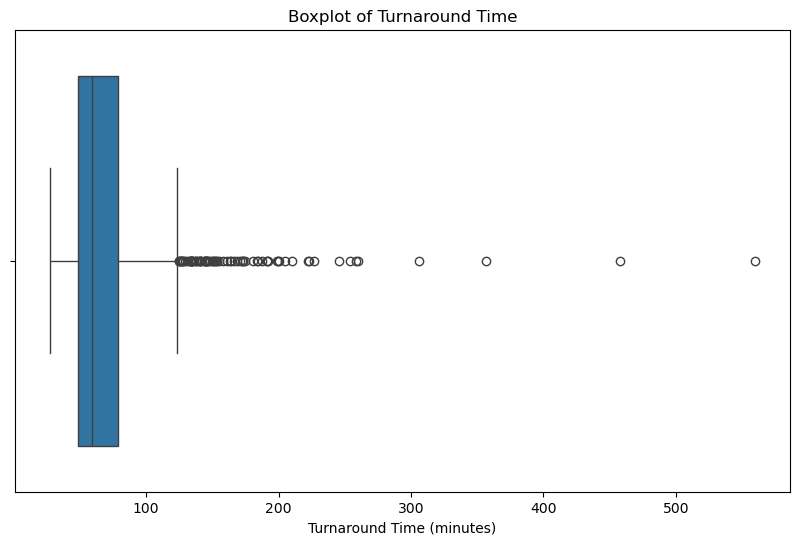

In [325]:
# evaluating outliers in the turnaround_time column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['turnaround_time'])
plt.title('Boxplot of Turnaround Time')
plt.xlabel('Turnaround Time (minutes)')
plt.show()
plt.savefig('../reports/figures/boxplot_turnaround_time.png')
plt.close()

In [326]:
#removing outliers in the turnaround_time column
Q1 = df['turnaround_time'].quantile(0.25)
Q3 = df['turnaround_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['turnaround_time'] >= lower_bound) & (df['turnaround_time'] <= upper_bound)]

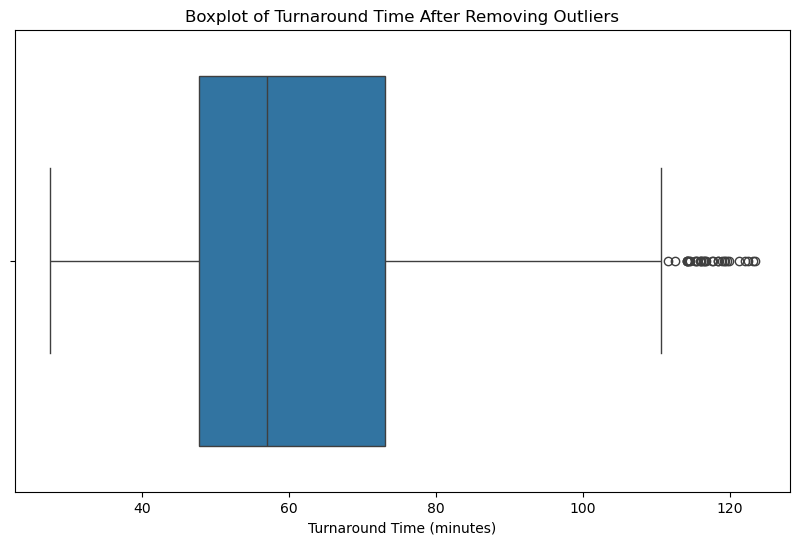

In [327]:
#checking again for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['turnaround_time'])
plt.title('Boxplot of Turnaround Time After Removing Outliers')
plt.xlabel('Turnaround Time (minutes)')
plt.show()
plt.savefig('../reports/figures/boxplot_turnaround_time_after_removing_outliers.png')
plt.close()

In [328]:
#getting summary statistics of the turnaround_time column
turnaround_time_stats = df['turnaround_time'].describe()
print("Summary statistics of turnaround_time:")
print(turnaround_time_stats)

Summary statistics of turnaround_time:
count    1032.000000
mean       62.214632
std        20.144885
min        27.483333
25%        47.704167
50%        57.000000
75%        73.079167
max       123.333333
Name: turnaround_time, dtype: float64


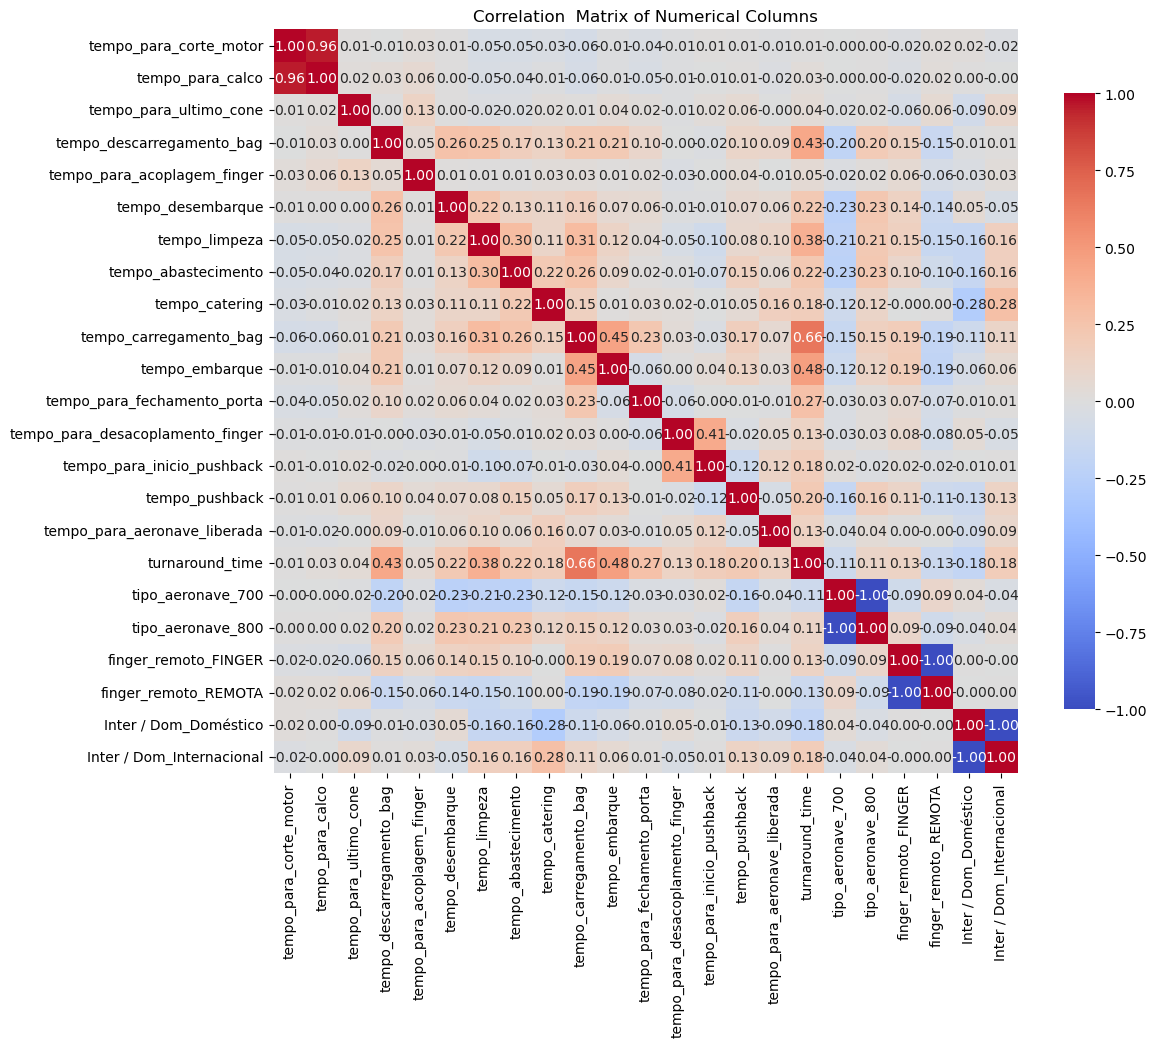

In [329]:
# checking for possible correlations between the numerical columns
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation  Matrix of Numerical Columns')
plt.show()
plt.savefig('../reports/figures/correlation_matrix_numerical_columns.png')
plt.close()

In [330]:
# Creating a new column to use as label for the model
df['label'] = df['turnaround_time'].apply(lambda x: 1 if x > 60 else 0)

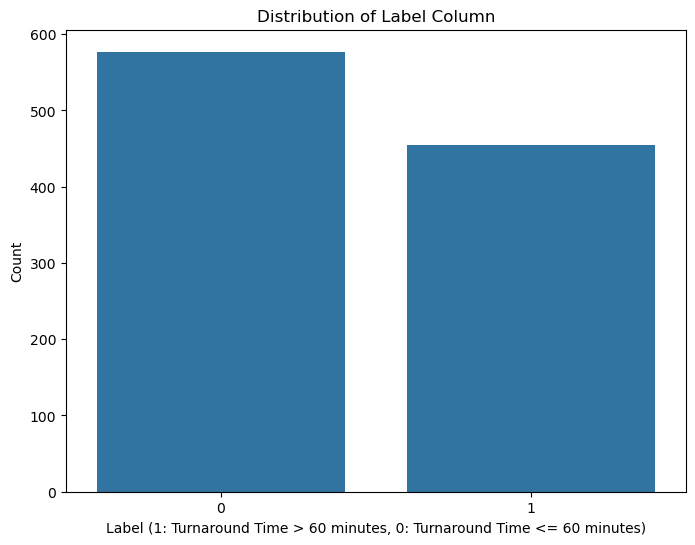

<Figure size 640x480 with 0 Axes>

In [331]:
#visualizing the distribution of the label column
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Label Column')
plt.xlabel('Label (1: Turnaround Time > 60 minutes, 0: Turnaround Time <= 60 minutes)')
plt.ylabel('Count')
plt.show()
plt.savefig('../reports/figures/distribution_label_column.png')

In [332]:
# checking the proportions of the label column
label_proportions = df['label'].value_counts(normalize=True)
print("Proportions of the label column:")
print(label_proportions)

Proportions of the label column:
label
0    0.559109
1    0.440891
Name: proportion, dtype: float64


In [333]:
# Separating the features and the label
X = df.drop(columns=['turnaround_time', 'label'])
y = df['label']

In [334]:
X.shape, y.shape

((1032, 22), (1032,))

In [337]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_train.value_counts(normalize=True)

label
0    0.558788
1    0.441212
Name: proportion, dtype: float64

## Creating the preprocessing pipeline

In [338]:
# creating the pipeline for data preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [339]:
# Applying the columnsTransformer in the numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=['int64', 'float64']).columns.tolist())
    ], remainder='passthrough')

In [340]:
# Creating the model with logistic regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

In [341]:
# Training the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tempo_para_corte_motor',
                                                   'tempo_para_calco',
                                                   'tempo_para_ultimo_cone',
                                                   'tempo_descarregamento_bag',
                                                   'tempo_para_acoplagem_finger',
                                                   'tempo_desembarque',
                                                   'tempo_limpeza',
                                                   'tempo_abastecimento',
                                                   'tempo_catering',
                                                   'tempo...
                                                   'tempo_embarque',
                                                   'tempo_para_fechamento_porta',
                                                   'tempo_para_desacoplamento_finger',
                                                   'tempo_para_inicio_pushback',
                                                   'tempo_pushback',
                                                   'tempo_para_aeronave_liberada',
                                                   'tipo_aeronave_700',
                                                   'tipo_aeronave_800',
                                                   'finger_remoto_FINGER',
                                                   'finger_remoto_REMOTA',
                                                   'Inter / Dom_Doméstico',
                                                   'Inter / '
                                                   'Dom_Internacional'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [342]:
# prediction with the test set
y_pred = model.predict(X_test)

In [343]:
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

Accuracy of the model: 0.88


In [344]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       116
           1       0.91      0.80      0.85        91

    accuracy                           0.88       207
   macro avg       0.89      0.87      0.88       207
weighted avg       0.88      0.88      0.88       207



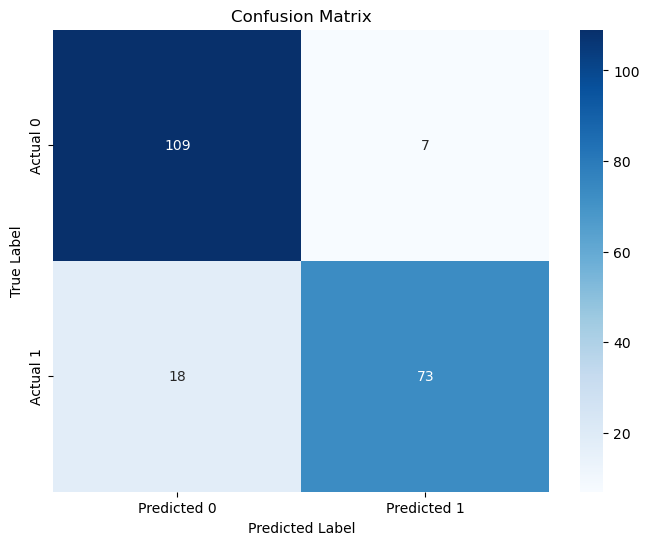

In [345]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.savefig('../reports/figures/confusion_matrix.png')
plt.close()

## Evaluating the model coefficients

In [346]:
coefficients = model.named_steps['classifier'].coef_[0]

In [347]:
#getting the feature names after one-hot encoding
feature_names = model.named_steps['preprocessor'].get_feature_names_out(X_train.columns)

In [348]:
feature_names

array(['num__tempo_para_corte_motor', 'num__tempo_para_calco',
       'num__tempo_para_ultimo_cone', 'num__tempo_descarregamento_bag',
       'num__tempo_para_acoplagem_finger', 'num__tempo_desembarque',
       'num__tempo_limpeza', 'num__tempo_abastecimento',
       'num__tempo_catering', 'num__tempo_carregamento_bag',
       'num__tempo_embarque', 'num__tempo_para_fechamento_porta',
       'num__tempo_para_desacoplamento_finger',
       'num__tempo_para_inicio_pushback', 'num__tempo_pushback',
       'num__tempo_para_aeronave_liberada', 'num__tipo_aeronave_700',
       'num__tipo_aeronave_800', 'num__finger_remoto_FINGER',
       'num__finger_remoto_REMOTA', 'num__Inter / Dom_Doméstico',
       'num__Inter / Dom_Internacional'], dtype=object)

In [349]:
# creating a dataframe to visualize the feature importance, with normal and absolute values
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
coef_df

,Feature,Coefficient,Absolute Coefficient
9,num__tempo_carregamento_bag,1.719486,1.719486
10,num__tempo_embarque,1.246013,1.246013
3,num__tempo_descarregamento_bag,0.867295,0.867295
11,num__tempo_para_fechamento_porta,0.863459,0.863459
1,num__tempo_para_calco,0.634291,0.634291
13,num__tempo_para_inicio_pushback,0.615024,0.615024
12,num__tempo_para_desacoplamento_finger,0.527868,0.527868
6,num__tempo_limpeza,0.444730,0.444730
0,num__tempo_para_corte_motor,-0.350928,0.350928
14,num__tempo_pushback,0.311085,0.311085


In [350]:
# Analyzing coefficients with SHAP
explainer = shap.Explainer(model.named_steps['classifier'], model.named_steps['preprocessor'].transform(X_train))
shap_values = explainer(model.named_steps['preprocessor'].transform(X_test))

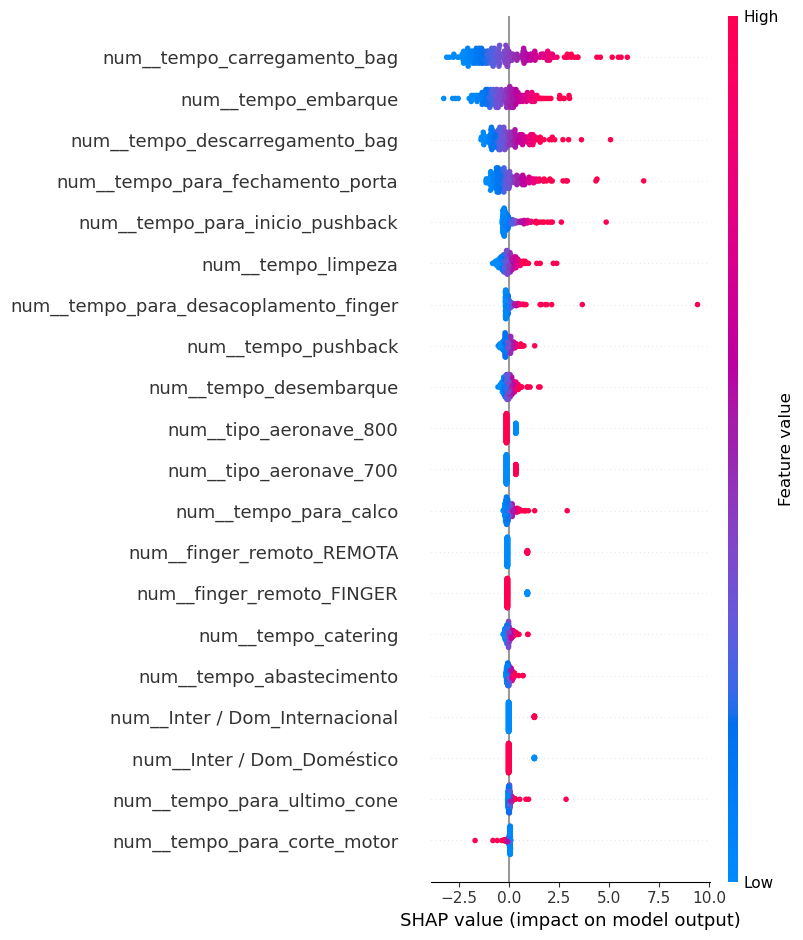

In [351]:
#plotting the SHAP summary plot
shap.summary_plot(shap_values, features=model.named_steps['preprocessor'].transform(X_test), feature_names=feature_names)
plt.savefig('../reports/figures/shap_summary_plot.png')
plt.close()